# Анализ продаж бара (с открытия бизнеса)

# Описание данных

<i>Датасет</i> `db_aqsi_bar_19-21.csv`

Датасет содержит данные о продажах и возвратах товаров, совершенных в баре.<br>

`Дата` — дата операции,<br>
`Время` — время операции,<br>
`Тип операции` — тип операции,<br>
`№ смены` — номер смены кассира,<br>
`№ чека за смену` — номер чека смены,<br>
`Список позиций [наименование товара, количество предмета расчета, цена до применения скидок, стоимость единицы предмета расчета]` — список товаров в чеке,<br>
`Итог по чеку` — сумма чека,<br>
`Способ оплаты` — способ оплаты.<br>

<i>Расшифровки событий</i>

`Приход` — продажа товара,<br>
`Возврат прихода` — возврат товара.<br>

<br>
<b>Предстоит сделать:</b><br>
- провести исследовательский анализ данных<br>
- проверить статистические гипотезы<br>
- дать рекомендации

# Шаг 1. Загрузка данных и подготовка их к анализу

## Файлы с данными и общая информация

Импортирую библиотеки, загружаю данные о приходах и возвратах

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import re
import math
import scipy.stats as st
from statsmodels.stats.weightstats import ztest as ztest
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#from plotly import graph_objects as go
from IPython.display import display
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None, 'display.max_rows', None)
colors = ['#b61f2e', '#dc6e57', '#f7b799', '#feebdf', '#ededed', '#c7c7c7', '#919191', '#535353']
sns.set(style='white', rc={'figure.figsize':(15, 20)})

try:
    df = pd.read_csv('/Users/xbymzymx/Desktop/db_aqsi_bar_19-21.csv')
except:
    df = pd.read_excel('https://docs.google.com/spreadsheets/d/1VdBhrIiH8SLNINypsFxygxSc3iO0FvWlmUJcqKj8gjk/export?format=xlsx')

Просматриваю основную информацию о данных

In [2]:
def about_df(df):
    '''
    Основная информация о данных
    '''
    try:
        df.hist(color='darkred', figsize=(10, 4));
    except ValueError:
        print('Нечего вывести в график')
    return  [
            display(df.head()),
            display(df.info()),
            display(df.describe(datetime_is_numeric=True, include='all')),
            display(f'Дубликатов в датафрейме: {len(df) - len(df.drop_duplicates())}'),
            ]

,Дата,Время,Тип операции,№ смены,№ чека за смену,"Список позиций \nнаименование товара, количество предмета расчета, цена до применения скидок, стоимость единицы предмета расчета, ставка НДС, способ расчета, тип предмета расчета, непреобразованное значение считанного сканером кода товарной номенклатуры, код товарной номенклатуры, наименование поставщика, телефон поставщика, ИНН поставщика, тип агента, операция платежного агента, наименование оператора перевода, адрес оператора перевода, ИНН оператора перевода, телефон оператора перевода, телефон платежного агента, телефон оператора по приему платежей, дополнительный реквизит предмета расчета, код страны происхождения товара, номер таможенной декларации, акциз",Итог по чеку,Способ оплаты
0,2019-11-29,18:15:00,Приход,1,1,"[Adrenaline Rush Game Fuel синий, 1, 170.00, 1...",170,Безналичными
1,2019-11-29,20:56:00,Приход,1,2,"[Товар, 1, 50.00, 50.00, 6, , 1, , , , , , , ,...",50,Безналичными
2,2019-11-29,20:56:00,Приход,1,3,"[Товар, 1, 30.00, 30.00, 6, , 1, , , , , , , ,...",30,Наличными
3,2019-11-29,21:05:00,Приход,1,4,"[Adrenaline Rush Game Fuel синий, 1, 170.00, 1...",340,Наличными
4,2019-11-29,22:21:00,Приход,1,5,"[Фанта 0,5, 1, 80.00, 80.00, 6, 4, 1, , , , , ...",80,Безналичными


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                                                                                                  

None

,Дата,Время,Тип операции,№ смены,№ чека за смену,"Список позиций \nнаименование товара, количество предмета расчета, цена до применения скидок, стоимость единицы предмета расчета, ставка НДС, способ расчета, тип предмета расчета, непреобразованное значение считанного сканером кода товарной номенклатуры, код товарной номенклатуры, наименование поставщика, телефон поставщика, ИНН поставщика, тип агента, операция платежного агента, наименование оператора перевода, адрес оператора перевода, ИНН оператора перевода, телефон оператора перевода, телефон платежного агента, телефон оператора по приему платежей, дополнительный реквизит предмета расчета, код страны происхождения товара, номер таможенной декларации, акциз",Итог по чеку,Способ оплаты
count,6788,6788,6788,6788.000000,6788.000000,6788,6788.000000,6788
unique,NaN,1273,2,NaN,NaN,1448,NaN,3
top,NaN,21:42:00,Приход,NaN,NaN,"[Кока-Кола 0.5, 1, 80.00, 80.00, 6, 4, 1, , , ...",NaN,Безналичными
freq,NaN,18,6736,NaN,NaN,288,NaN,4434
mean,2020-08-15 05:05:41.543900928,NaN,NaN,182.771509,12.925751,NaN,139.762817,NaN
min,2019-11-29 00:00:00,NaN,NaN,1.000000,1.000000,NaN,20.000000,NaN
25%,2020-02-21 00:00:00,NaN,NaN,90.000000,6.000000,NaN,70.000000,NaN
50%,2020-10-06 00:00:00,NaN,NaN,182.000000,11.000000,NaN,100.000000,NaN
75%,2021-01-09 00:00:00,NaN,NaN,279.000000,18.000000,NaN,170.000000,NaN
max,2021-03-12 00:00:00,NaN,NaN,341.000000,58.000000,NaN,1690.000000,NaN


'Дубликатов в датафрейме: 0'

[None, None, None, None]

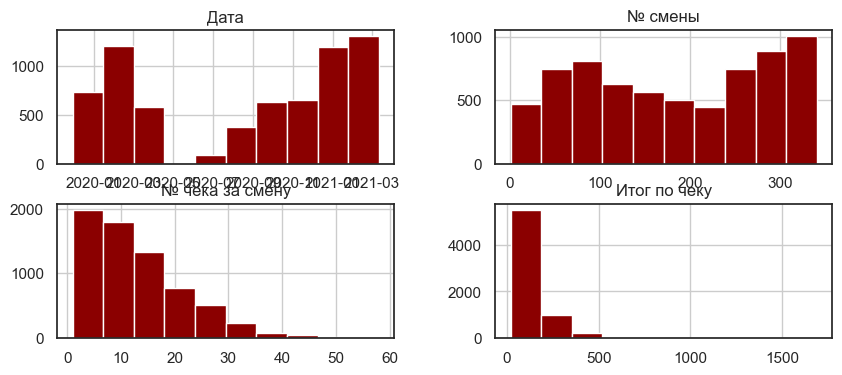

In [3]:
about_df(df)

## Обработка и очистка данных

Переименовываю колонки таблиц, приводя их к змеиному регистру

In [4]:
df.columns

Index(['Дата', 'Время', 'Тип операции', '№ смены', '№ чека за смену',
       'Список позиций \nнаименование товара, количество предмета расчета, цена до применения скидок, стоимость единицы предмета расчета, ставка НДС, способ расчета, тип предмета расчета, непреобразованное значение считанного сканером кода товарной номенклатуры, код товарной номенклатуры, наименование поставщика, телефон поставщика, ИНН поставщика, тип агента, операция платежного агента, наименование оператора перевода, адрес оператора перевода, ИНН оператора перевода, телефон оператора перевода, телефон платежного агента, телефон оператора по приему платежей, дополнительный реквизит предмета расчета, код страны происхождения товара, номер таможенной декларации, акциз',
       'Итог по чеку', 'Способ оплаты'],
      dtype='object')

In [5]:
df = df.rename(columns={'Дата': 'event_date', 
                       'Время': 'event_time', 
                       'Тип операции': 'event_type',
                       '№ смены': 'shift',
                       '№ чека за смену': 'check',
                       'Список позиций \nнаименование товара, количество предмета расчета, цена до применения скидок, стоимость единицы предмета расчета, ставка НДС, способ расчета, тип предмета расчета, непреобразованное значение считанного сканером кода товарной номенклатуры, код товарной номенклатуры, наименование поставщика, телефон поставщика, ИНН поставщика, тип агента, операция платежного агента, наименование оператора перевода, адрес оператора перевода, ИНН оператора перевода, телефон оператора перевода, телефон платежного агента, телефон оператора по приему платежей, дополнительный реквизит предмета расчета, код страны происхождения товара, номер таможенной декларации, акциз': 'list_of_positions',
                       'Итог по чеку': 'amount_check',
                       'Способ оплаты': 'payment_method',})

Преобразую столбец date в формат datetime. Добавляю объединенный столбец datetime

In [6]:
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_datetime'] = pd.to_datetime(df['event_date'].dt.strftime('%Y-%m-%d') + df['event_time'].astype(str), format = '%Y-%m-%d%H:%M:%S')

Пропуски и дубликаты отсутствуют

Разделю стобец list_of_positions на различные данные для дальнейшего удобства

In [7]:
def replace_commas(text):
    '''
    Функция для замены запятых на точки части текста определенного вида (в наименовании товара)
    '''
    return re.sub(r'(\d+,\d+)', lambda match: match.group().replace(',', '.'), text)

In [8]:
df.list_of_positions = df.list_of_positions.apply(replace_commas)

In [9]:
def split_positions(row):
    '''
    Функция для разделения данных в столбце при изначальном виде данных: список списков в виде строки
    '''
    return [x.strip('[, ]').split(', ') for x in row.split('], [')]

In [10]:
df['list_of_positions'] = df['list_of_positions'].apply(split_positions)

Разбиваю список списков на отдельные строки

In [11]:
df = df.explode('list_of_positions').reset_index(drop=True)

Разделяю оставшие данные в столбце list_of_positions на отдельные столбцы с данными

In [12]:
df['item_name'] = df.list_of_positions.apply(lambda x: x[0])
df['item_count'] = df.list_of_positions.apply(lambda x: x[1]).astype(int)
df['item_price'] = df.list_of_positions.apply(lambda x: x[2]).astype(float)

Удаляю столбец list_of_positions

In [13]:
df.pop('list_of_positions')
df.head()

,event_date,event_time,event_type,shift,check,amount_check,payment_method,event_datetime,item_name,item_count,item_price
0,2019-11-29,18:15:00,Приход,1,1,170,Безналичными,2019-11-29 18:15:00,Adrenaline Rush Game Fuel синий,1,170.0
1,2019-11-29,20:56:00,Приход,1,2,50,Безналичными,2019-11-29 20:56:00,Товар,1,50.0
2,2019-11-29,20:56:00,Приход,1,3,30,Наличными,2019-11-29 20:56:00,Товар,1,30.0
3,2019-11-29,21:05:00,Приход,1,4,340,Наличными,2019-11-29 21:05:00,Adrenaline Rush Game Fuel синий,1,170.0
4,2019-11-29,21:05:00,Приход,1,4,340,Наличными,2019-11-29 21:05:00,Adrenaline Rush,1,170.0


Добавлю товарам категории

In [14]:
df.loc[df['item_name'].str.contains('Кока|Dew|Чай|0.5|Добрый|Aqua'), 'item_category'] = 'напитки'
df.loc[df['item_name'].str.contains('Rush|Red|E-ON'), 'item_category'] = 'энергетики'
df.loc[df['item_name'].str.contains('Сникерс|Твикс|Кит|M&M|Скитлс|Mars|Way|Bounty|Picnic'), 'item_category'] = 'шоколадки'
df.loc[df['item_name'].str.contains('Багет|Ролл|Сэндвич|Сендвич'), 'item_category'] = 'сэндвичи'
df.loc[df['item_name'].str.contains('печать|Сканирование'), 'item_category'] = 'типография'

Добавлю данные о периодах с нулевой выручкой

In [15]:
date_range_coronavirus = pd.date_range(start='2020-03-28', end='2020-07-12', freq='D')

df_coronavirus = pd.DataFrame({'event_date': date_range_coronavirus})
df_coronavirus[['event_datetime', 'event_time', 'event_type', 'item_category',
         'item_name', 'item_count', 'item_price', 'shift',
        'check', 'payment_method']] = np.nan
df_coronavirus['amount_check'] = 0

In [16]:
df = pd.concat([df.iloc[:3313], df_coronavirus, df.iloc[3313:]], ignore_index=True)

In [17]:
date_range_cataclysm = pd.date_range(start='2020-08-14', end='2020-09-11', freq='D')

df_cataclysm = pd.DataFrame({'event_date': date_range_cataclysm})
df_cataclysm[['event_datetime', 'event_time', 'event_type', 'item_category',
         'item_name', 'item_count', 'item_price', 'shift',
        'check', 'payment_method']] = np.nan
df_cataclysm['amount_check'] = 0

In [18]:
df = pd.concat([df.iloc[:4081], df_cataclysm, df.iloc[4081:]], ignore_index=True)

Добавляю столбцы с днем недели, месяцем и часом суток

In [19]:
def get_hours(time):
    '''
    Функция возвращающая часы из объекта datetime.time 
    '''
    try:
        return time.hour
    except:
        return np.nan

In [20]:
df['event_hour'] = df['event_time'].apply(get_hours)
df = df.astype({'event_hour': 'Int64'})

In [21]:
df['event_day_of_week'] = df['event_date'].dt.dayofweek

In [22]:
df['event_month'] = df['event_date'].dt.month

Добавляю столбец с выручкой по позициям

In [23]:
df['revenue'] = df['item_price'] * df['item_count']

Меняю порядок столбцов для будущего удобства

In [24]:
df = df[['event_datetime',
    'event_date',
    'event_month',
    'event_day_of_week',
    'event_time',
    'event_hour',
    'event_type',
    'item_category',
    'item_name', 
    'item_count', 
    'item_price', 
    'revenue',
    'shift', 
    'check', 
    'amount_check', 
    'payment_method']]

Данные очищены, преобразованы по столбцам, приведены к нужным типам. Дубликатов и пропусков нет.

Итоговый просмотр датафрейма после манипуляций

,event_datetime,event_date,event_month,event_day_of_week,event_time,event_hour,event_type,item_category,item_name,item_count,item_price,revenue,shift,check,amount_check,payment_method
0,2019-11-29 18:15:00,2019-11-29,11,4,18:15:00,18,Приход,энергетики,Adrenaline Rush Game Fuel синий,1.0,170.0,170.0,1.0,1.0,170,Безналичными
1,2019-11-29 20:56:00,2019-11-29,11,4,20:56:00,20,Приход,NaN,Товар,1.0,50.0,50.0,1.0,2.0,50,Безналичными
2,2019-11-29 20:56:00,2019-11-29,11,4,20:56:00,20,Приход,NaN,Товар,1.0,30.0,30.0,1.0,3.0,30,Наличными
3,2019-11-29 21:05:00,2019-11-29,11,4,21:05:00,21,Приход,энергетики,Adrenaline Rush Game Fuel синий,1.0,170.0,170.0,1.0,4.0,340,Наличными
4,2019-11-29 21:05:00,2019-11-29,11,4,21:05:00,21,Приход,энергетики,Adrenaline Rush,1.0,170.0,170.0,1.0,4.0,340,Наличными


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9493 entries, 0 to 9492
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_datetime     9357 non-null   datetime64[ns]
 1   event_date         9493 non-null   datetime64[ns]
 2   event_month        9493 non-null   int64         
 3   event_day_of_week  9493 non-null   int64         
 4   event_time         9357 non-null   object        
 5   event_hour         9357 non-null   Int64         
 6   event_type         9357 non-null   object        
 7   item_category      9355 non-null   object        
 8   item_name          9357 non-null   object        
 9   item_count         9357 non-null   float64       
 10  item_price         9357 non-null   float64       
 11  revenue            9357 non-null   float64       
 12  shift              9357 non-null   float64       
 13  check              9357 non-null   float64       
 14  amount_c

None

,event_datetime,event_date,event_month,event_day_of_week,event_time,event_hour,event_type,item_category,item_name,item_count,item_price,revenue,shift,check,amount_check,payment_method
count,9357,9493,9493.000000,9493.000000,9357,9357.0,9357,9355,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9493.000000,9357
unique,NaN,NaN,NaN,NaN,1273,<NA>,2,5,52,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,00:04:00,<NA>,Приход,напитки,Кока-Кола 0.5,NaN,NaN,NaN,NaN,NaN,NaN,Безналичными
freq,NaN,NaN,NaN,NaN,30,<NA>,9296,4328,891,NaN,NaN,NaN,NaN,NaN,NaN,6059
mean,2020-08-21 14:51:18.679063808,2020-08-20 00:08:47.883703808,5.419678,3.264932,NaN,13.56439,NaN,NaN,NaN,1.178369,87.149193,101.390403,186.173667,13.360799,180.443485,NaN
min,2019-11-29 18:15:00,2019-11-29 00:00:00,1.000000,0.000000,NaN,0.0,NaN,NaN,NaN,1.000000,20.000000,20.000000,1.000000,1.000000,0.000000,NaN
25%,2020-02-24 18:21:00,2020-02-25 00:00:00,2.000000,2.000000,NaN,4.0,NaN,NaN,NaN,1.000000,50.000000,50.000000,93.000000,6.000000,80.000000,NaN
50%,2020-10-13 06:07:00,2020-10-09 00:00:00,3.000000,4.000000,NaN,17.0,NaN,NaN,NaN,1.000000,70.000000,80.000000,188.000000,12.000000,140.000000,NaN
75%,2021-01-10 21:13:00,2021-01-09 00:00:00,10.000000,5.000000,NaN,20.0,NaN,NaN,NaN,1.000000,140.000000,140.000000,280.000000,19.000000,230.000000,NaN
max,2021-03-12 23:57:00,2021-03-12 00:00:00,12.000000,6.000000,NaN,23.0,NaN,NaN,NaN,12.000000,170.000000,1190.000000,341.000000,58.000000,1690.000000,NaN


'Дубликатов в датафрейме: 0'

[None, None, None, None]

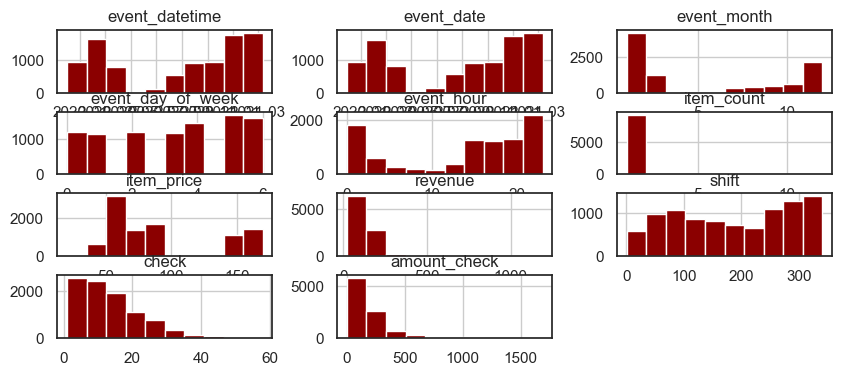

In [25]:
about_df(df)

# Шаг 2. Функции для расчёта и анализа

## `plot_pie()` — для создания диаграмм

In [26]:
def plot_pie(column, title):
    '''
    Функция, которая рисует диаграмму. 
    Принимает на вход данные и наименование диаграммы.
    '''
    plt.rcParams["figure.figsize"] = (10, 6)
    column.plot(kind='pie',
        autopct='%1.0f%%',  
        legend=False, 
        ylabel='', 
        colors=colors,
        fontsize=12)
    plt.title(title, weight='bold', fontsize=20, y=1.05, ha='center')
    plt.show();

## `plot_bar_hor()` — для создания горизонтального барчарта

In [27]:
def plot_bar_hor(df, x, y, title, hue=None):
    '''
    Функция, которая рисует горизонтальный барчарт с подписями. 
    Принимает на вход датафрейм, количественную колонку, категориальную колонку, 
    наименование диаграммы и категорию данных (по умолчанию - нет).
    '''
    ax = sns.barplot(x=x,
            y=y,
            hue=hue,
            data=df,
            palette=sns.color_palette('RdGy', 11),
            orient='h',
            saturation=1,
            dodge=False)
    sns.despine(bottom=True, left=True) 
    ax.set_title(title, weight='bold', fontsize=20, y=1.05)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=12, padding=5)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, loc='best', framealpha = 0)
    plt.xticks([])
    plt.show()

## `plot_bar_vert()` — для создания вертикального барчарта

In [28]:
def plot_bar_vert(df, x, y, title, xlabel):
    '''
    Функция, которая рисует вертикальный барчарт с подписями. 
    Принимает на вход датафрейм, количественную колонку, категориальную колонку, наименование диаграммы, подпись оси х.
    '''
    ax = sns.barplot(x = x,
            y = y,
            data = df,
            palette=sns.color_palette('RdGy', 24),
            saturation=1)
    sns.despine(bottom=True, left=True) 
    ax.set_title(title, weight='bold', fontsize=20, y=1.05)
    ax.set_xlabel(xlabel, weight='bold')
    ax.set_ylabel('')
    ax.bar_label(ax.containers[0], fmt='%d', fontsize=12, padding=5)
    plt.yticks([])
    plt.show()

# Шаг 3. Исследовательский анализ данных

## Тип операции

In [29]:
df.event_type.value_counts()

Приход             9296
Возврат прихода      61
Name: event_type, dtype: int64

Добавлю операциям по Возврату знаки минус в столбцах item_count и revenue

In [30]:
return_df = df.query('event_type == "Возврат прихода"')

return_df['item_count'] = return_df['item_count'] * -1
return_df['revenue'] = return_df['revenue'] * -1

In [31]:
df = pd.concat([df, return_df])
df = df.loc[~df.index.duplicated(keep='last')]

## Товары

In [32]:
df.item_name.unique()

array(['Adrenaline Rush Game Fuel синий', 'Товар', 'Adrenaline Rush',
       'Фанта 0.5', 'Сникерс', 'Кока-Кола 0.5', 'Бонаква 0.5', 'Твикс',
       'Чай Fuzetea Манго-ромашка', 'Сок Добрый апельсиновый',
       'Чай Fuzetea Лесные ягоды 0.5', 'Кит Кат',
       'Adrenaline Rush Game Fuel зелёный', 'Adrenaline Rush Juicy',
       'E-ON ALMOND', 'Спрайт 0.5', 'Adrenaline Rush Red Energy',
       'Цветная печать', 'Mountain Dew', 'M&M Арахис', 'Скитлс Зелёный',
       'Скитлс Красный', 'M&M Шоколад', 'Черно-белая печать',
       'Сканирование', 'Сендвич с ветчиной и сыром',
       'Багет курица Цезарь', 'Багет ветчина сыр', 'Сэндвич ветчина сыр',
       'Лаймон Фреш 0.5', 'Багет курица Карри', 'Багет Салями',
       'Багет говядина Барбекю', 'Aqua Minerale Active лимон',
       'Mountain Dew 0.33', 'Бонаква газ 0.5', 'Bounty', 'Picnic', nan,
       'Aqua Minerale 0.5', 'Aqua Minerale газ 0.5',
       'Багет индейка Терияки', 'Сэндвич с куриным филе',
       'Сэндвич с ветчиной и сыром', '

Есть три позиции с сэндвичами (ветчина-сыр), написанные по-разному. Привожу к единому наименованию. Также убираю две позиции Товар - они неинформативны. Скорее всего были тестовыми при открытии и забыли удалить.

In [33]:
df.item_name = df.item_name.replace('Сендвич с ветчиной и сыром', 'Сэндвич с ветчиной и сыром')
df.item_name = df.item_name.replace('Сэндвич ветчина сыр', 'Сэндвич с ветчиной и сыром')

In [34]:
df = df[df.item_name != 'Товар']

### Количество проданных товаров

In [35]:
items = df.groupby(['item_name', 'item_category'], as_index=False)['item_count'] \
            .sum() \
            .sort_values(by=['item_category', 'item_count'], ascending=[True, False]) \
            .reset_index(drop=True)
items.head()

,item_name,item_category,item_count
0,Кока-Кола 0.5,напитки,1036.0
1,Mountain Dew,напитки,691.0
2,Чай Fuzetea Манго-ромашка,напитки,572.0
3,Aqua Minerale Active лимон,напитки,503.0
4,Чай Fuzetea Лесные ягоды 0.5,напитки,498.0


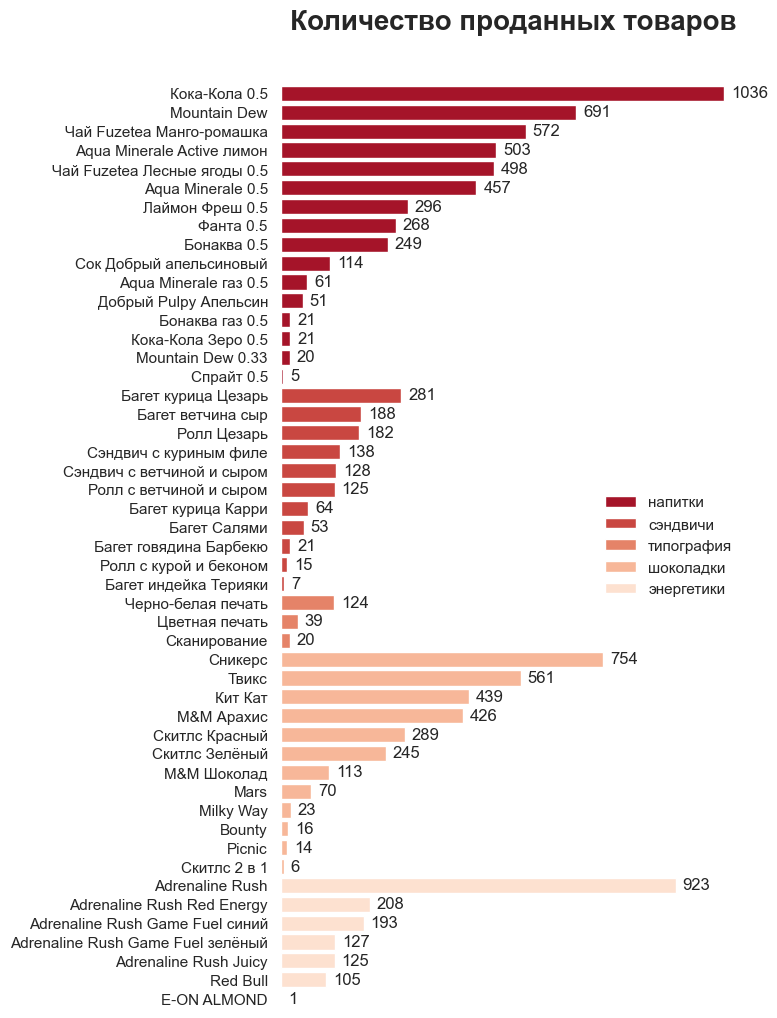

In [36]:
sns.set(style='white', rc={'figure.figsize':(6, 12)})

plot_bar_hor(items,
            'item_count',
            'item_name',
            'Количество проданных товаров',
            'item_category')

Самые продаваемые товары: `Кока-Кола 0.5`, `Adrenaline Rush` и `Сникерс`. 

Больше всего товаров продано в категории: `напитки`. 

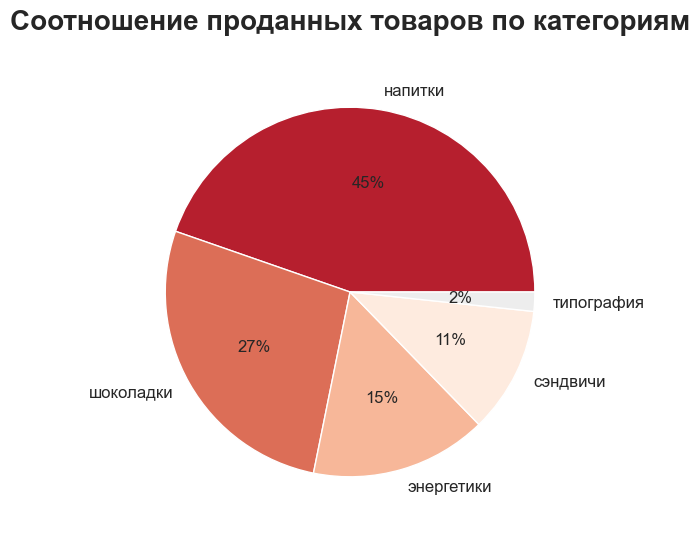

In [37]:
plot_pie(df.groupby('item_category')['item_count'] \
         .sum() \
         .sort_values(ascending=False),
         'Соотношение проданных товаров по категориям')

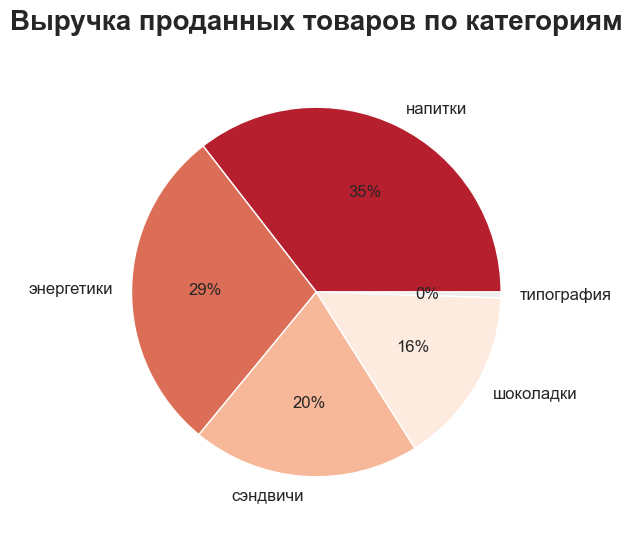

In [38]:
plot_pie(df.groupby('item_category')['revenue'] \
         .sum() \
         .sort_values(ascending=False),
         'Выручка проданных товаров по категориям')

Категория "Напитки" является лидером по выручке и количеству продаж.

Категория "Энергетики" также имеет значительную выручку, несмотря на более низкое количество продаж по сравнению с "Напитками". Это указывает на более высокую цену. 

Категория "Сэндвичи" имеет относительно высокую выручку, но низкое количество продаж по сравнению с "Напитками" и "Шоколадками". Это может указывать на более высокую стоимость.

Категория "Типография" имеет самую низкую выручку и количество продаж среди всех категорий.

### Категории проданных товаров по месяцам

In [39]:
info_to_subplots = df.groupby(['event_month', 'item_category'], as_index=False)['item_count'] \
            .sum() \
            .sort_values(by=['event_month', 'item_category'], ascending=[True, False]) \
            .reset_index(drop=True)
info_to_subplots['item_count'] = info_to_subplots['item_count'].astype('Int64')

In [40]:
addition_info_to_subplots = pd.DataFrame({
    'event_month': [7], 
    'item_category': ['типография'], 
    'item_count': [0]})

info_to_subplots = pd.concat([info_to_subplots.iloc[:17], addition_info_to_subplots, info_to_subplots.iloc[17:]], ignore_index=True)

In [41]:
month_names = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

info_to_subplots['event_month'] = info_to_subplots['event_month'].replace(month_names)

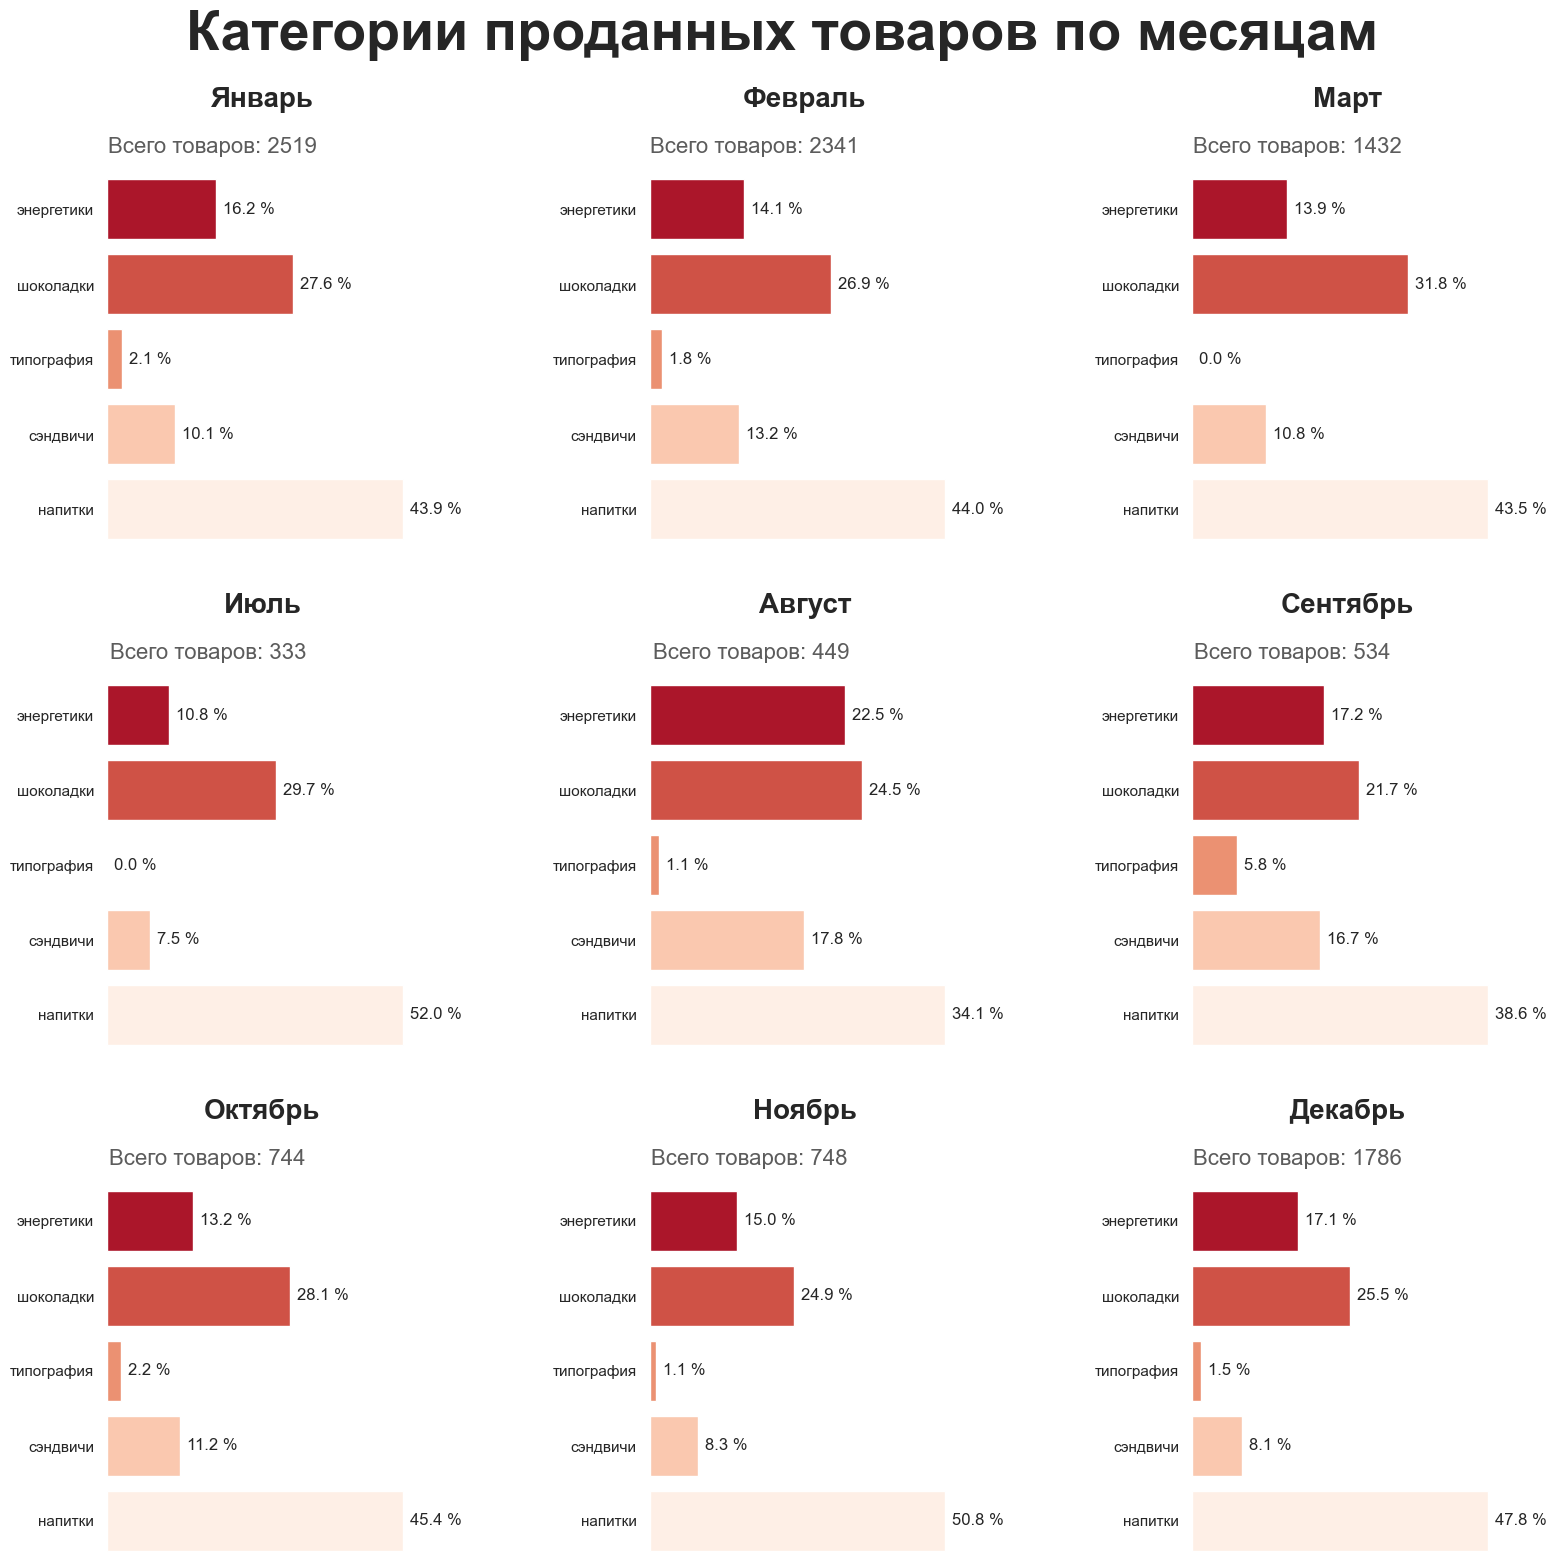

In [42]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
plt.subplots_adjust(hspace=0.35, wspace=0.75)
fig.suptitle('Категории проданных товаров по месяцам', weight='bold', fontsize=40, y=0.97)

months = list(info_to_subplots.event_month.unique())

for month, ax in zip(months, axs.ravel()):
    ax = sns.barplot(x='item_count',
            y='item_category',
            data = info_to_subplots[info_to_subplots["event_month"] == month].sort_values(by='item_category', ascending=False),
            palette=sns.color_palette('RdGy', 10),
            orient='h',
            saturation=1,
            ax=ax)
    
    sns.despine(bottom=True, left=True) 
    sns.set_palette('RdGy')
    ax.set_title(f'{month}', weight='bold', fontsize=20, y=1.15, ha='center')
    ax.text(x=1.5, y=-0.75, s=f'Всего товаров: {info_to_subplots[info_to_subplots["event_month"] == month].item_count.sum()}', fontsize=16, alpha=0.75)
    ax.bar_label(ax.containers[0], 
                 fmt=lambda x: '{:.1f} %'.format(x * 100 / info_to_subplots[info_to_subplots["event_month"] == month].item_count.sum()), 
                 fontsize=12, 
                 padding=5)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([])
    
plt.show();

Смотря на продажи товаров в баре в разрезе месяцев, можно увидеть следующие закономерности:

1) в августе месяце энергетики популярнее, чем в другие месяцы
2) в марте месяце шоколадки популярнее, чем в другие месяцы
3) типография не пользуется спросом в марте и июле, однако в сентябре популярность повышается в 3 раза
4) сэндвичи популярнее в августе и сентябре
5) напитки менее популярны в августе и сентябре

В целом, все категории достаточно стабильны (колебания ~ 10%)

Также важным дополнением является то, что отсутствуют данные за три месяца: апрель, май и июнь (коронавирусное время), а также данные за июле и август являются неполными (заведение работало по полмесяца от каждого из них).

## Выручка

### Выручка по всем дням

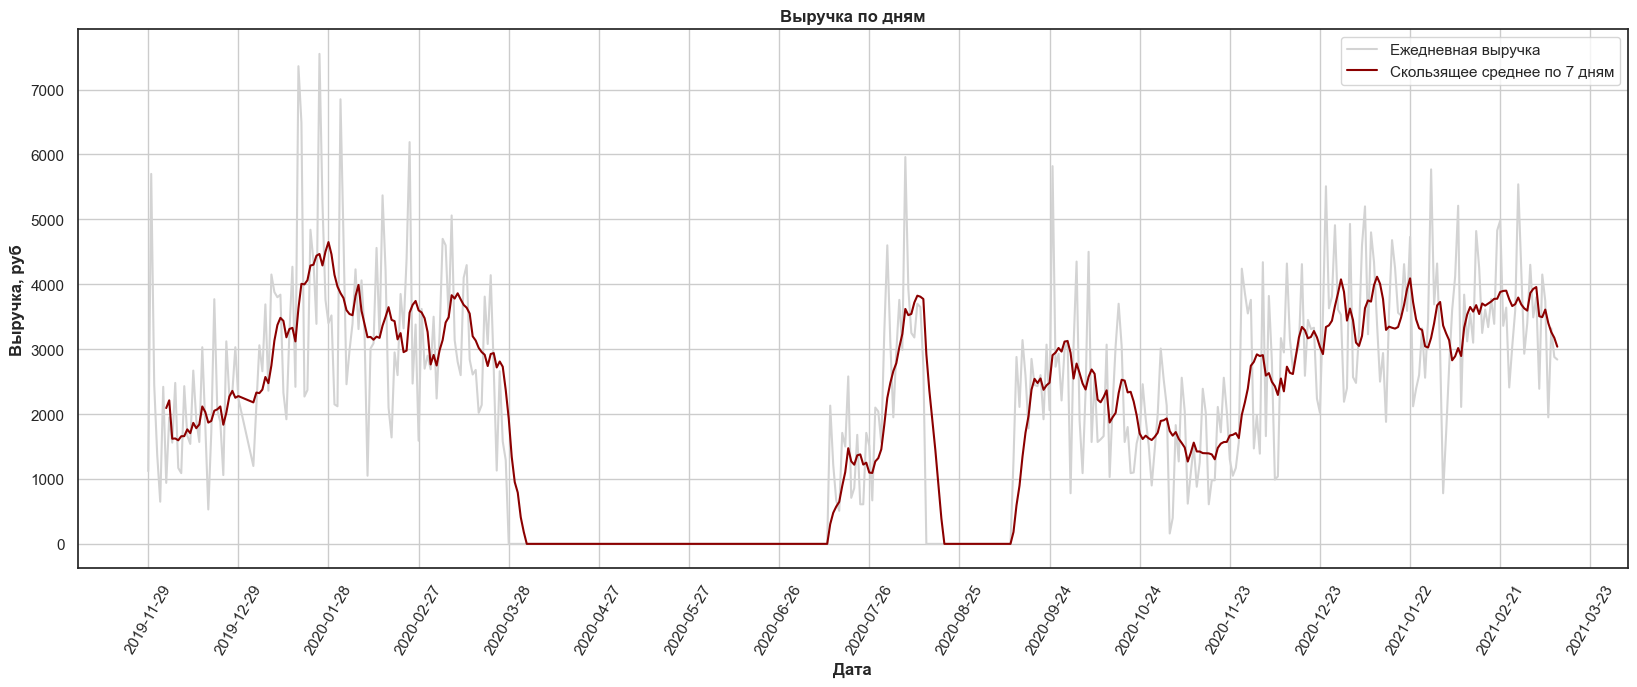

In [43]:
sns.set(style='white', rc={'figure.figsize':(20, 7)})

df_daily_revenue = df.groupby('event_date', as_index=False)['revenue'].sum()
df_daily_revenue['rolling_mean'] = df_daily_revenue['revenue'].rolling(window=7).mean()

sns.lineplot(data=df_daily_revenue, y='revenue', x='event_date', errorbar=None, color='lightgray', label='Ежедневная выручка')
sns.lineplot(data=df_daily_revenue, y='rolling_mean', x='event_date', color='darkred', label='Скользящее среднее по 7 дням')

plt.grid(True)
plt.title('Выручка по дням', weight='bold')
plt.xlabel('Дата', weight='bold')
plt.ylabel('Выручка, руб', weight='bold')
plt.xticks(np.arange(df_daily_revenue.event_date.value_counts().index.min(),
                     df_daily_revenue.event_date.value_counts().index.max() + dt.timedelta(days=30),
                     dt.timedelta(days=30)),
          rotation=60)
plt.legend()
plt.show();

Выручка в баре компьютерного клуба напрямую зависит от количества клиентов, приходящих поиграть.

Начиная с открытия клуба выручка по бару росла до конца января месяца, дальше пошел спад (закончились новогодние праздники, началась сессия у студентов), далее начался период стагнации до конца марта. Затем начался период коронавруса с закрытием общественных заведений и продлился до июля. 

После открытия заведения выручка и клиенты вернулись, начался хороший рост, который вышел на уровень дороконавирусного времени за месяц. Однако, в середине июля в заведении случился неприятный катаклизм природного происхождения, что заставило заведение закрыться на месяц в связи с ремонтом. 

По окончании работ заведение вновь открылось, но за месяц успело сильно потерять клиентов, которые вернулись  после открытия заведений в послекоронавирусные времена. Сущетсвенный рост начался только с конца ноября, когда дело приблизилось к новогодним праздникам. 

Пик выручки (обычно приходящийся на январь месяц) не был достигнут в 2020 году так, как в 2019. Но выручка, в целом, вышла на уровень докоронавирусного периода и стабилизировалась.

### Выручка по дням недели

In [44]:
df_daily_week_revenue = df.groupby(['event_day_of_week', 'shift'], as_index=False)['revenue'].sum() \
                            .groupby('event_day_of_week', as_index=False)['revenue'].mean()
df_daily_week_revenue

,event_day_of_week,revenue
0,0,1306.179775
1,1,1219.111111
2,2,1348.516484
3,3,1282.967033
4,4,1568.709677
5,5,1836.182796
6,6,1660.430108


In [45]:
day_names = {
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}

df_daily_week_revenue['event_day_of_week'] = df_daily_week_revenue['event_day_of_week'].replace(day_names)

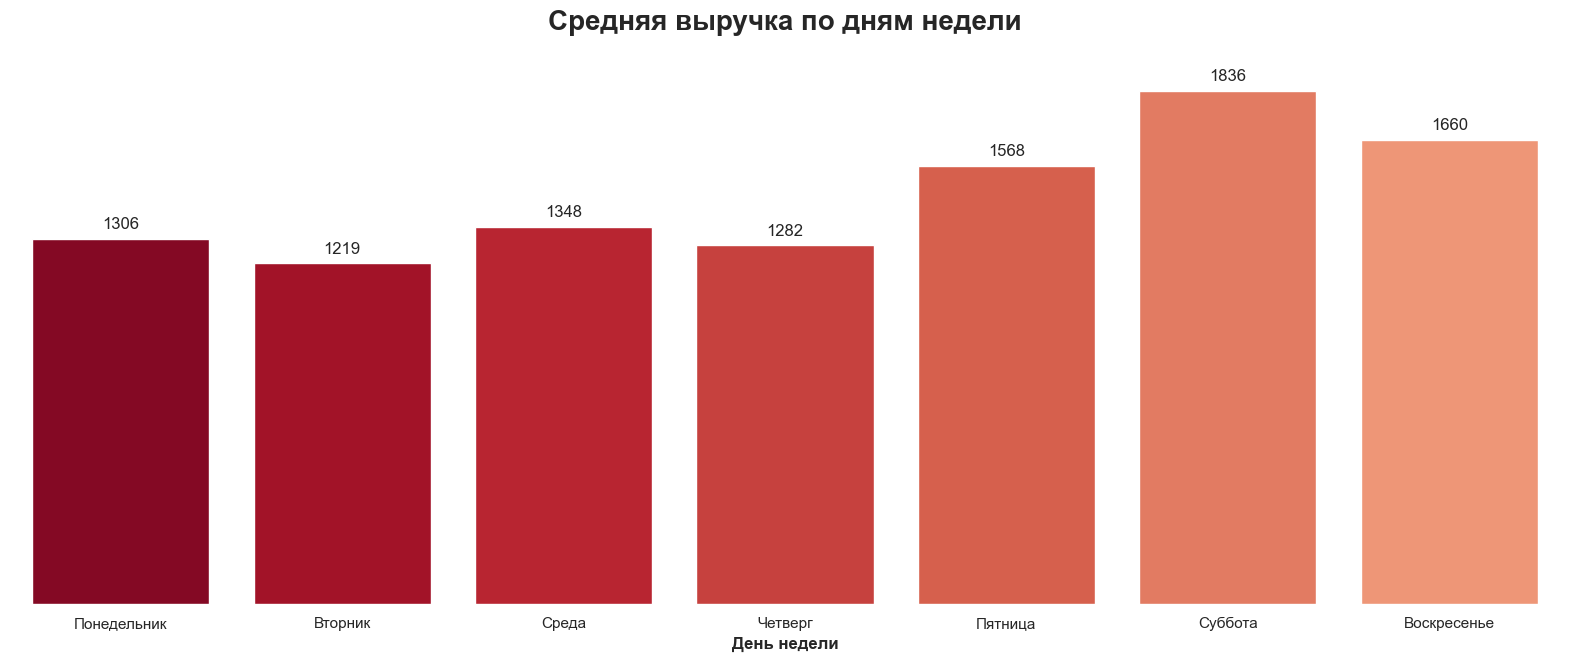

In [46]:
plot_bar_vert(df_daily_week_revenue, 'event_day_of_week', 'revenue', 'Средняя выручка по дням недели', 'День недели')

Наибольшая выручка приходится на субботу (много клиентов приходит в ночь с пятницы на субботу и с субботы на воскресенье).

В целом, пятница, суббота и воскресенье являются самыми прибыльными по продажам бара.

А среда - это маленькая пятница :)

### Выручка по часам в сутках

In [47]:
df_daily_hour_revenue = df.groupby(['event_hour', 'shift'], as_index=False)['revenue'].sum()
df_daily_hour_revenue.head()

,event_hour,shift,revenue
0,0,2.0,850.0
1,0,3.0,50.0
2,0,12.0,170.0
3,0,15.0,80.0
4,0,16.0,160.0


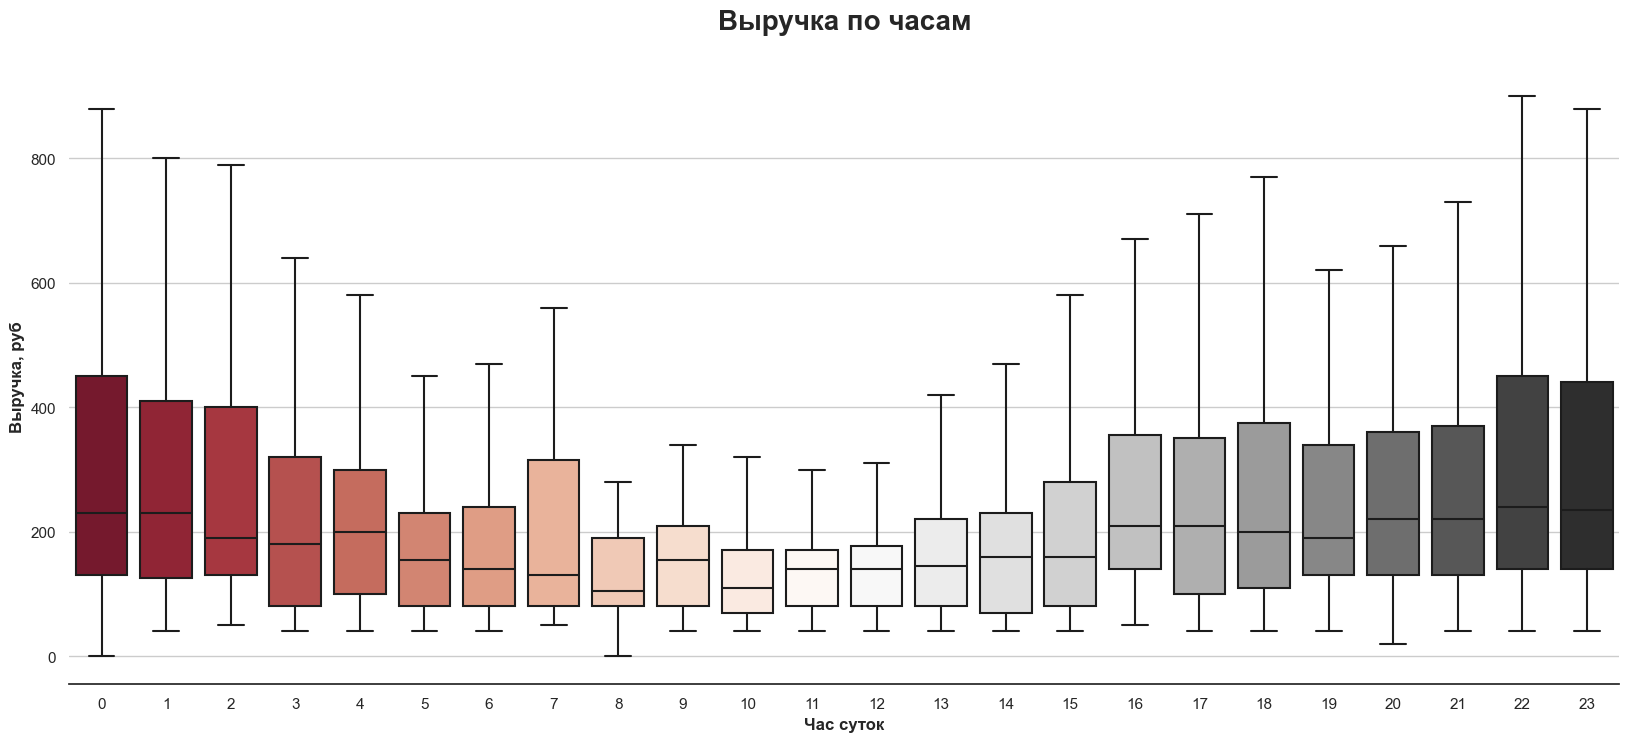

In [48]:
sns.set(style='white', rc={'figure.figsize':(20, 8)})

sns.boxplot(data=df_daily_hour_revenue, y='revenue', x='event_hour', showfliers=False, palette='RdGy')

plt.title('Выручка по часам', weight='bold', fontsize=20, y=1.05)
plt.ylabel('Выручка, руб', weight='bold')
plt.xlabel('Час суток', weight='bold')
sns.despine(left=True) 
plt.grid(axis='y')
plt.show();

Заведение работает круглосуточно. 

Максимальная выручка приходится на периоды с 22:00 до 01:00. 

Минимальная выручка - с 10:00 до 13:00.

С 13:00 выручка начинает расти с приходом бОльшего количества клиентов. Однако, большинство клиентов приходили с 16:00, что и видно по 50% перцентилю в этом часу.

Выделяющиеся значения на графике:
1) 07:00: обуславливается тем, что пересменка администраторов была с 08:00 до 09:00. Соответственно, если имелись какие-то задолженности клиентов, которые забыли внести в течение смены, то они пробивались в период  с 7 до 8 (иногда 9) утра. 
2) 09:00: повышенное среднее значение связано с тем, что были клиенты, которые приходили ровно к открытию, садились на весь день и сразу закупались едой

## Способы оплаты

In [49]:
df.payment_method.value_counts()

Безналичными               6058
Наличными                  3296
Безналичными, Наличными       1
Name: payment_method, dtype: int64

Удаляю строку с методом оплаты "Безналичными, Наличными". Это была явно ошибка, нельзя было оплатить частично. Неизвестно, как оплачено было на самом деле

In [50]:
df = df[df.payment_method != 'Безналичными, Наличными']

### Сравнение способов оплаты до и после коронавируса

In [51]:
df_before = df.query('event_date <= "2020-03-27"') \
        .groupby(['payment_method'], as_index=False)['item_count'] \
        .sum() \
        .rename(columns={'item_count': 'before'})

df_before['share, %'] = df_before['before'].apply(lambda x: round(x / df_before['before'].sum() * 100, 2))
df_before

,payment_method,before,"share, %"
0,Безналичными,2131.0,54.66
1,Наличными,1768.0,45.34


In [52]:
df_after = df.query('event_date >= "2020-07-13"') \
        .groupby(['payment_method'], as_index=False)['item_count'] \
        .sum() \
        .rename(columns={'item_count': 'after'})

df_after['share, %'] = df_after['after'].apply(lambda x: round(x / df_after['after'].sum() * 100, 2))
df_after

,payment_method,after,"share, %"
0,Безналичными,4710.0,67.42
1,Наличными,2276.0,32.58


До коронавируса большинство людей предпочитало платить безналичными деньгами - таких было 54.66% от общего количества платежей. Меньшая часть людей предпочитала платить наличными деньгами - 45.34%.

После коронавируса ситуация изменилась. Больше людей стали пользоваться безналичными способами оплаты - таких стало 67.42%. Сократилось количество людей, которые предпочитают наличные платежи - их доля стала составлять 32.58%.

Таким образом, можно сказать, что после появления коронавируса люди стали чаще использовать безналичные платежи и меньше платить наличными. Это связано, вероятно, с тем, что люди хотели избегать риска заболеть вирусом и соблюдать безопасность при оплате.

## Шаг 4. Проверка статистической гипотезы

In [53]:
def z_test(sample1, sample2, alpha=0.05):
    # Вычисление средних значений выборок
    mean1 = sample1.mean()
    mean2 = sample2.mean()
    
    # Вычисление стандартных отклонений выборок
    std1 = sample1.std()
    std2 = sample2.std()
    
    # Вычисление размеров выборок
    n1 = len(sample1)
    n2 = len(sample2)
    
    # Вычисление стандартной ошибки разности средних значений
    standard_error = math.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Вычисление разности средних значений
    difference = mean1 - mean2
    
    # Вычисление z-значения
    z_value = difference / standard_error
    
    # Вычисление p-значения
    p_value = 2 * (1 - st.norm.cdf(abs(z_value)))
    
    # Вывод результатов
    print('z-значение: ', z_value)
    print('p-значение: ', p_value)
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу, средние значения выборок различаются')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, средние значения выборок не различаются')

### Товары из категории "энергетики" в среднем приносят больше выручки в смену, чем  из категории "напитки"

H0: Средняя выручка от продажи энергетиков и напитков в смену одинакова.

H1: Средняя выручка от продажи энергетиков в смену больше, чем от продажи напитков.

Для проверки этой гипотезы можно использовать двухвыборочный z-тест для сравнения двух средних.

В качестве первой выборки можно использовать данные по выручке от продажи энергетиков, а в качестве второй выборки - данные по выручке от продажи напитков.

In [54]:
df_energy = df[df.item_category == 'энергетики'].groupby(['shift'])['revenue'].sum()
df_drinks = df[df.item_category == 'напитки'].groupby(['shift'])['revenue'].sum()

In [55]:
z_test(df_energy, df_drinks)

z-значение:  -3.332815496195298
p-значение:  0.0008597193443662388
Отвергаем нулевую гипотезу, средние значения выборок различаются


Так как p-значение ~ 0.0009, это означает, что вероятность получить такое или еще более экстремальное различие между выборками при условии, что нулевая гипотеза верна, очень мала.

Существует статистически значимое различие между выборками.

А так как z-значение - отрицательное, то средняя прибыль от продаж товаров из категории энергетики в смену больше, чем из категории напитки.

### Средний чек наличными больше, чем средний чек по картам

H0: Средний чек наличными равен среднему чеку по картам.

H1: Средний чек наличными больше среднего чека по картам.

Для проверки этой гипотезы можно использовать двухвыборочный z-тест для сравнения двух средних. 

В качестве первой выборки можно использовать данные по выручке от наличных платежей, а в качестве второй выборки - данные по выручке от карт.

In [56]:
df_card = df[df.payment_method == 'Безналичными'].groupby(['check'])['revenue'].mean()
df_cash = df[df.payment_method == 'Наличными'].groupby(['check'])['revenue'].mean()

In [57]:
z_test(df_card, df_cash)

z-значение:  -1.1985566865834183
p-значение:  0.2307003686291167
Не получилось отвергнуть нулевую гипотезу, средние значения выборок не различаются


Значение p равно 0.231, соответственно, нулевую гипотезу отклонить не получается.

Средний чек наличными равен среднему чеку по картам.

## Шаг 5. Общий вывод

Продукты из категории напитки и энергетики, особенно Coca-Cola 0.5 и Adrenaline Rush, являются самыми продаваемыми.</br>
Категория "Энергетики" имеет высокую выручку, несмотря на более низкое количество продаж по сравнению с категорией "Напитки".</br>
Категория "Сэндвичи" имеет высокую выручку, но низкое количество продаж по сравнению с "Напитками" и "Шоколадками".</br>
Категория "Типография" имеет самую низкую выручку и количество продаж среди всех категорий.</br>

Пятница, суббота и воскресенье являются самыми прибыльными днями. 

Наблюдается повышенная популярность безналичных платежей после вспышки коронавируса.

Важно учесть, что данные за определенные месяцы отсутствуют или неполные из-за коронавирусной пандемии и ремонта. Рекомендуется внимательно анализировать новые данные и убедиться, что будущий анализ основывается на полной информации, чтобы принимать точные решения.

## Шаг 6. Рекомендации

1) Продолжать развивать категории напитки и энергетики и обеспечивать широкий ассортимент.

2) Провести анализ цен на энергетики, чтобы определить, возможно ли увеличить объем продаж путем снижения цены или предложения акций и скидок.

3) Изучить причины низкого спроса на сэндвичи и рассмотреть внесение изменений в ассортимент, качество или ценообразование данной категории товаров.

4) Провести анализ спроса на услуги типографии и оценить целесообразность их предоставления. Если спрос остается низким, возможно, стоит рассмотреть замену или расширение услуг, которые могут привлечь больше клиентов.

5) Продолжать предоставлять безналичные способы оплаты и, возможно, рассмотреть внедрение новых технологий и платежных систем для облегчения процесса оплаты и повышения удобства для клиентов. Например, дистанцинно, через личный кабинет в CRM-системе.

6) Сосредоточить усилия на продвижении бара и мероприятий в периоды с 22:00 до 01:00, когда наблюдается максимальная выручка. Это может включать организацию тематических вечеринок, акций и специальных предложений.

7) Уделять внимание привлечению новых клиентов и удержанию постоянной клиентской базы.

8) Важно привлекать клиентов в утренние часы (с 10:00 до 13:00), которые предпочитают начинать свой день с посещения заведения.

9) Обратить внимание на динамику продаж по месяцам и анализировать изменения в предпочтениях клиентов. Это поможет планировать акции и рекламные кампании, чтобы максимизировать продажи в популярные периоды.